In [1]:
import os
import spikeinterface.full as si
from spikeinterface.curation import get_potential_auto_merge
from P1_SpikeSort.spikesort import make_recording_from_paths_and_get_times

ModuleNotFoundError: No module named 'Elrond'

In [2]:
mouse = 21
day = 16
mouse_day = "M"+str(mouse)+"_D"+str(day)
project_path = "/mnt/datastore/Harry/Cohort11_april2024/"
recording_paths = []
recording_paths.extend([f.path for f in os.scandir(project_path+"vr") if f.is_dir()])
recording_paths.extend([f.path for f in os.scandir(project_path+"of") if f.is_dir()])
recording_paths = [s for s in recording_paths if mouse_day in s]
recording_paths

['/mnt/datastore/Harry/Cohort11_april2024/vr/M21_D16_2024-05-16_14-40-02_VR1',
 '/mnt/datastore/Harry/Cohort11_april2024/of/M21_D16_2024-05-16_15-30-33_OF2',
 '/mnt/datastore/Harry/Cohort11_april2024/of/M21_D16_2024-05-16_14-03-05_OF1']

In [3]:
sorting_analyzer = si.load_sorting_analyzer('/mnt/datastore/Harry/Cohort11_april2024/derivatives/M21/D16/ephys/sorting_analyzer')

In [4]:
recording_mono, rec_samples = make_recording_from_paths_and_get_times(recording_paths)

In [5]:
sorting_analyzer._recording = recording_mono

In [6]:
sorting_analyzer.get_saved_extension_names()


['noise_levels',
 'template_similarity',
 'templates',
 'spike_amplitudes',
 'correlograms',
 'quality_metrics',
 'spike_locations',
 'unit_locations',
 'random_spikes']

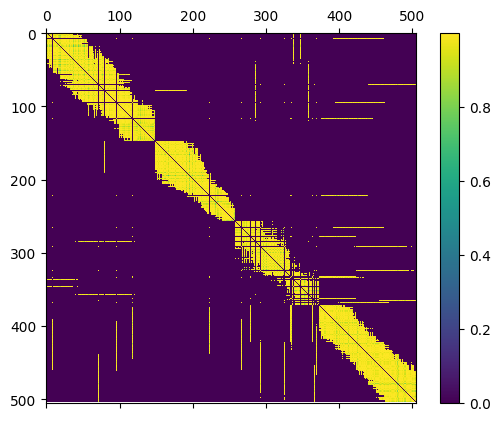

In [7]:
si.plot_template_similarity(sorting_analyzer,
                            unit_ids=None, 
                            cmap='viridis', 
                            display_diagonal_values=False, 
                            show_unit_ticks=False, 
                            show_colorbar=True,
                            backend=None)

In [ ]:
sorting_analyzer.compute(["random_spikes", "templates", "template_similarity", 
                          "correlograms", "unit_locations", "spike_locations", 
                          "spike_amplitudes"])


In [24]:
# with resolve_graph=True, merges_resolved is a list of merge groups,
# which can contain more than two units
merge_unit_groups = get_potential_auto_merge(
    sorting_analyzer=sorting_analyzer,
    preset="temporal_splits",
    resolve_graph=True
)

# here we apply the merges
sorting_analyzer_merged = sorting_analyzer.merge_units(merge_unit_groups=merge_unit_groups, merging_mode='hard')

KeyboardInterrupt: 

In [ ]:
merge_unit_groups

In [ ]:
print("starting with ", sorting_analyzer.get_num_units(), "units")
print("ending with ", sorting_analyzer_merged.get_num_units(), "units")